In [29]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

The following is taken from the README file:

- "Caveats: `primary_fuel` is the fuel that has been identified to provide the largest portion of generated electricity for the plant or has been identified as the primary fuel by the data source.
For power plants that have data in multiple `other_fuel` fields, the ordering of the fuels should not be taken to indicate any priority or preference of the fuel for operating the power plant or generating units.
Though the `other_fuel` columns in the database are numbered sequentially from 1, the ordering is insignificant."

Based off of this information, we will combine the three columns ('other_fuel1', 'other_fuel2', 'other_fuel3') into one column and evaluate renewable energy possiblities from there (in terms of additional locations). Main focus will be on the 'primary_fuel' column. Additionally, a column called 'is_renewable' will be created based off of the 'primary_fuel' column. Columns deemed not needed for this exploration will be dropped.

In [2]:
# import data
gpp_data = pd.read_csv('./data/global_power_plant_database.csv')
gpp_data.head()

C:\Users\farrj\AppData\Local\Temp\ipykernel_24540\3648764891.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  gpp_data = pd.read_csv('./data/global_power_plant_database.csv')


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [3]:
remove_cols = ['country', 'name', 'commissioning_year', 'owner', 'source', 'url', 'geolocation_source', 'wepp_id', 'generation_data_source', 'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014', 'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016', 'estimated_generation_gwh_2017', 'estimated_generation_note_2013', 'estimated_generation_note_2014', 'estimated_generation_note_2015', 'estimated_generation_note_2016', 'estimated_generation_note_2017']
gpp_data.drop(columns= remove_cols, inplace= True)
gpp_data.head()

,country_long,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
0,Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
cols = ['other_fuel1', 'other_fuel2', 'other_fuel3']
gpp_data['other_fuel'] = gpp_data[cols].apply(lambda x: ', '.join(x.dropna().astype(str)), axis= 1)
gpp_data = gpp_data.drop(cols, axis= 1)
gpp_data.head()

,country_long,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,other_fuel
0,Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1,Afghanistan,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2,Afghanistan,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
3,Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
4,Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [21]:
gpp_data.primary_fuel.value_counts()

primary_fuel
Solar             10665
Hydro              7156
Wind               5344
Gas                3998
Coal               2330
Oil                2320
Biomass            1430
Waste              1068
Nuclear             195
Geothermal          189
Storage             135
Other                43
Cogeneration         41
Petcoke              12
Wave and Tidal       10
Name: count, dtype: int64

In [22]:
renewable_list = ['Hydro', 'Solar', 'Waste', 'Biomass', 'Wave and Tidal','Geothermal','Storage', 'Cogeneration','Wind']

def is_renewable(x, ren):
    return True if x in ren else False

In [23]:
gpp_data["is_renewable"] = gpp_data["primary_fuel"].apply(is_renewable, ren = renewable_list)

In [24]:
gpp_data.head()

,country_long,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,other_fuel,is_renewable
0,Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,True
1,Afghanistan,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,True
2,Afghanistan,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,True
3,Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,True
4,Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,True


In [26]:
gpp_data["possible_renewable"] = gpp_data["other_fuel"].apply(is_renewable, ren = renewable_list)
gpp_data["possible_renewable"].value_counts()

possible_renewable
False    34764
True       172
Name: count, dtype: int64

In [27]:
gpp_data.head()

,country_long,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,other_fuel,is_renewable,possible_renewable
0,Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,True,False
1,Afghanistan,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,True,False
2,Afghanistan,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,True,False
3,Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,True,False
4,Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,True,False


In [44]:
poss_renewables = gpp_data[gpp_data['possible_renewable'] == True]
poss_renewables

,country_long,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,other_fuel,is_renewable,possible_renewable
65,Algeria,WRI1023797,150.000,32.9475,3.2380,Gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Solar,False,True
98,Argentina,ARG0000242,1.904,-39.2145,-70.9157,Oil,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hydro,False,True
104,Argentina,ARG0000266,5.736,-41.1167,-71.4167,Oil,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hydro,False,True
143,Argentina,ARG0000087,5.052,-30.7636,-64.7538,Oil,2015.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hydro,False,True
9556,Czech Republic,WRI1019208,110.000,50.1535,14.1270,Gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Biomass,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34205,United States of America,USA0050810,66.400,32.2752,-92.7277,Biomass,2019.0,446.604810,417.803480,452.747850,495.161406,507.093137,492.967121,486.206617,Waste,True,True
34212,United States of America,USA0062683,11.000,36.0414,-94.1401,Storage,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,3.159000,Solar,True,True
34298,United States of America,USA0056322,273.100,47.0363,-120.2065,Wind,2019.0,659.863000,650.563000,609.963000,672.926000,613.464000,639.178000,613.275000,Solar,True,True
34318,United States of America,USA0001507,862.700,43.7508,-70.1567,Oil,2019.0,199.646997,253.188001,485.689004,0.000000,106.352000,156.385997,5.942000,Storage,False,True


C:\Users\farrj\AppData\Local\Temp\ipykernel_24540\3599485499.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


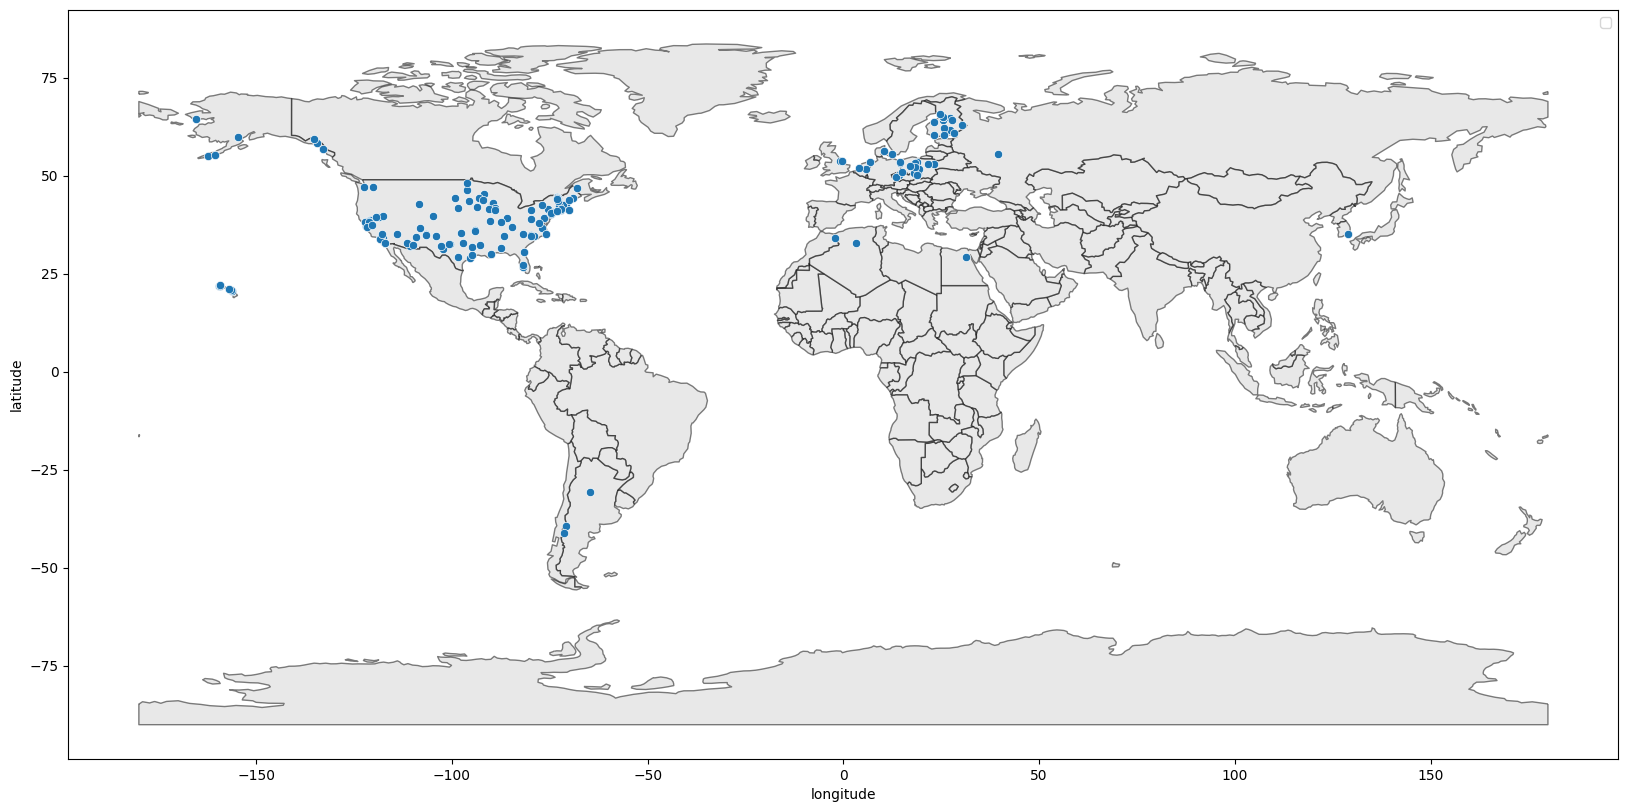

In [45]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
world.plot(
    ax=ax,
    color="lightgray",
    edgecolor="black",
    alpha=0.5
)


sns.scatterplot(data= poss_renewables, y="latitude",x="longitude", legend="auto")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

C:\Users\farrj\AppData\Local\Temp\ipykernel_24540\1353411761.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


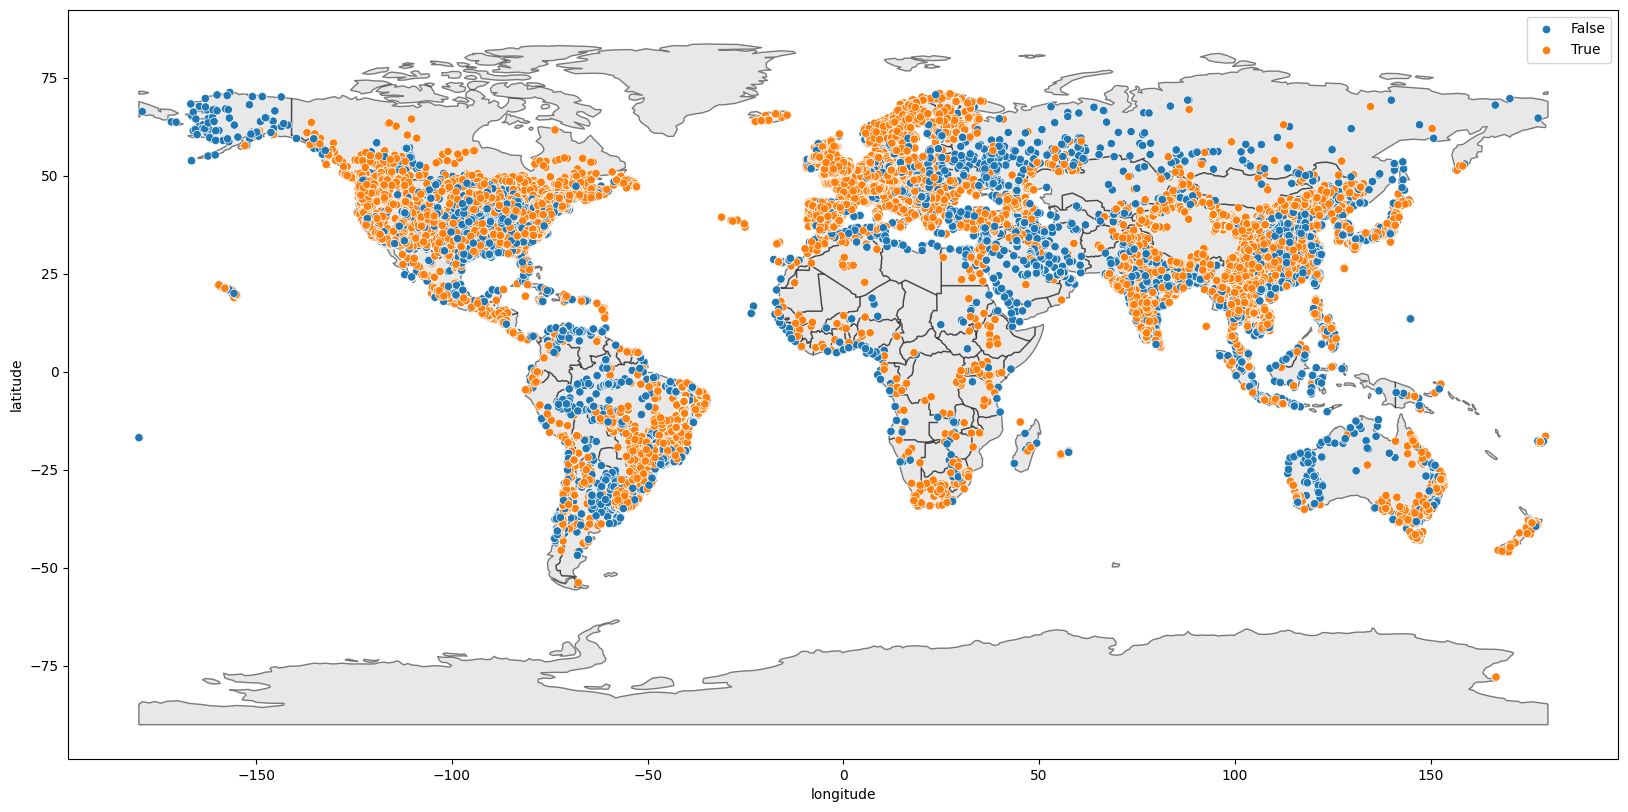

In [46]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()
world.plot(
    ax=ax,
    color="lightgray",
    edgecolor="black",
    alpha=0.5
)
sns.scatterplot(data= gpp_data, y="latitude",x="longitude", hue="is_renewable", legend="auto")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()